In [2]:
from roulette import Roulette
from core import *
from simulations_core import *
from simulations_plots_core import *
roulette = Roulette()

In [3]:
def paroli_betting(goal_money_won, start, money_limit):
    money = 0
    money_history = [money]
    streak = 0
    bet = start
    while money < goal_money_won:
        if money_limit is not None and money < money_limit:
            return money_history
        
        prev_money = money 
        money += roulette.make_even_bet(bet)
        money_history.append(money)
        if money < prev_money:
            streak = 0
            bet = start
        else:
            streak += 1
            bet *= 2
            if streak == 3:
                streak = 0
                bet = start

    return money_history

In [4]:
money_goals = [10, 100, 500, 1000]

In [5]:
money_histories = simulate_different_goal_money(
                    betting_type = paroli_betting, 
                    goal_money_list = money_goals, 
                    number_histories = 1000,
                    start_bet = 1,
                    money_limit = -1000)

In [6]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [7]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))
    print(f"For goal {goal} mean money lost:")
    print(get_mean_money_lost(money_histories, goal))

For goal 10 mean money won:
10.916776750330252
For goal 10 mean money lost:
-1001.0
For goal 100 mean money won:
100.93684210526315
For goal 100 mean money lost:
-1001.0
For goal 500 mean money won:
0
For goal 500 mean money lost:
-1001.0
For goal 1000 mean money won:
0
For goal 1000 mean money lost:
-1001.0


## Analysis when the goal is to win 10 units

In [8]:
len(successful_histories[10])

757

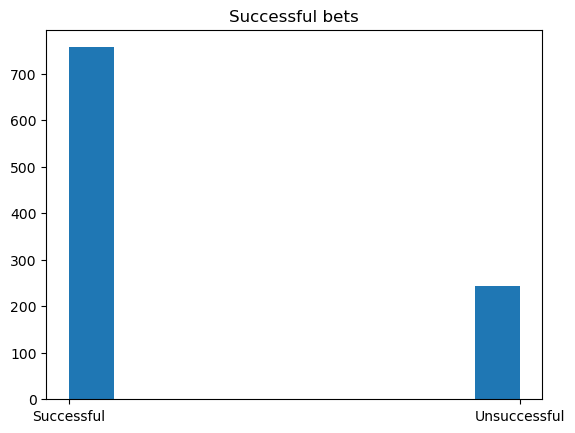

In [9]:
plot_successful_bets(money_histories[10], 10)

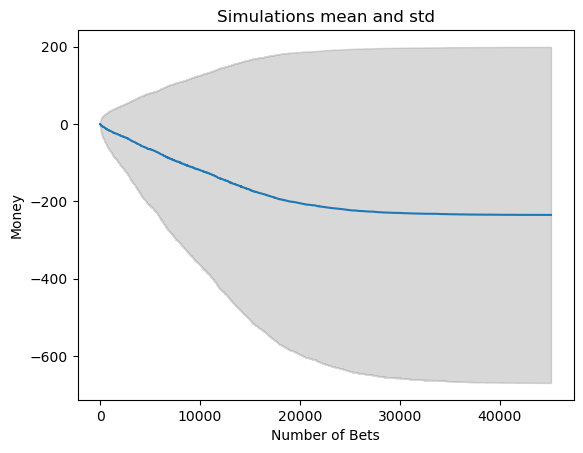

In [10]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, 10)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std')

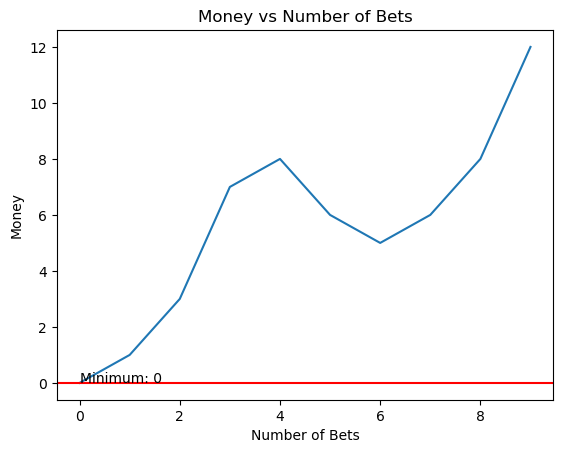

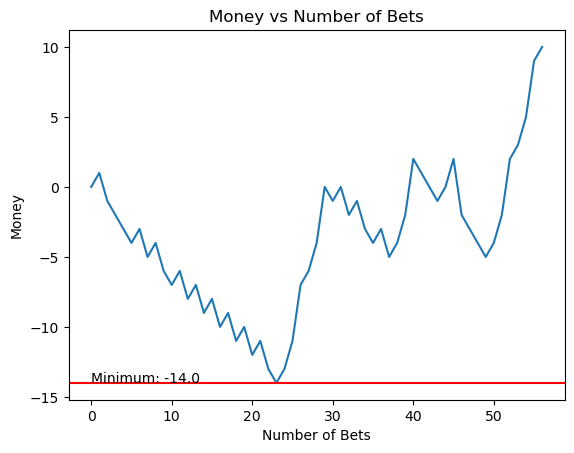

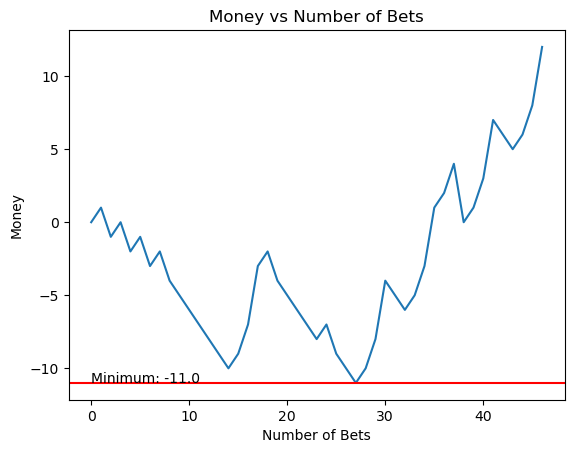

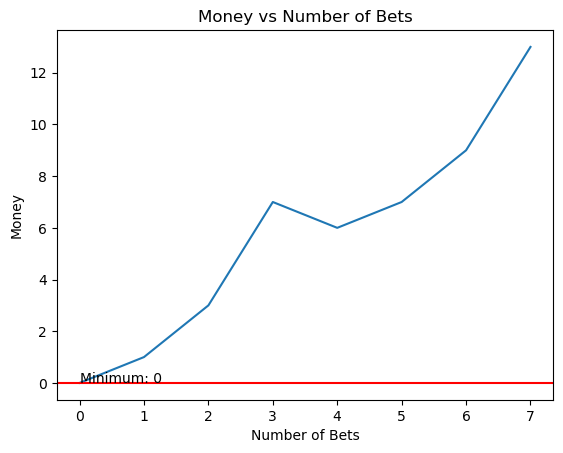

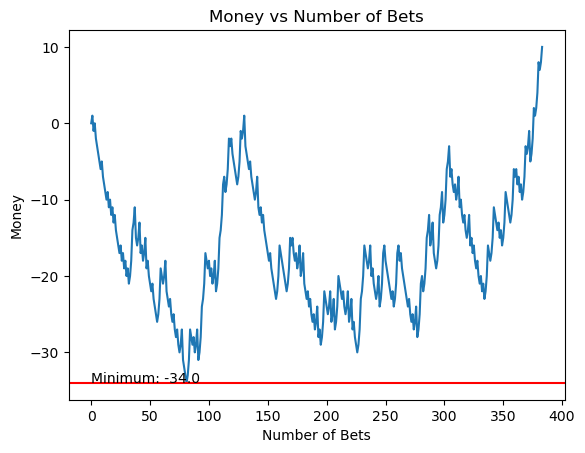

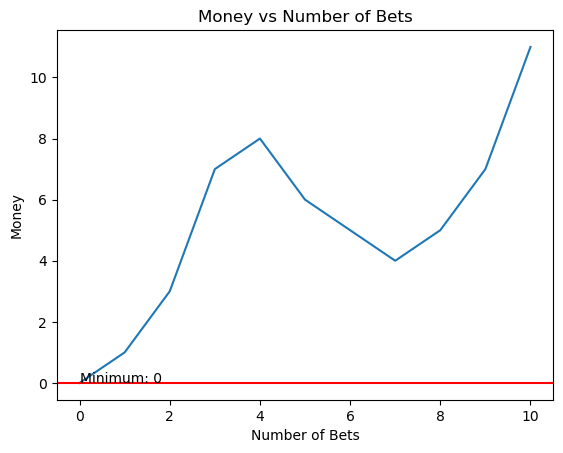

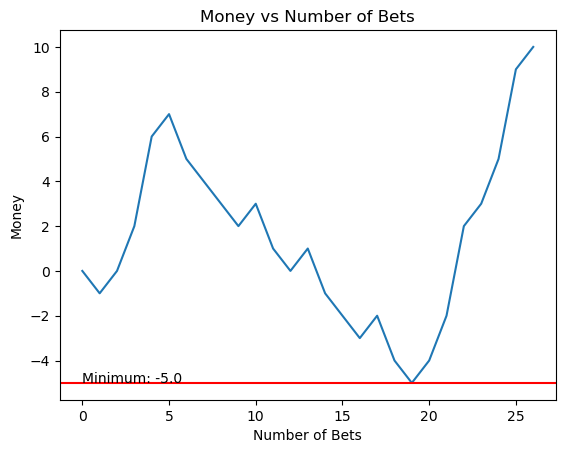

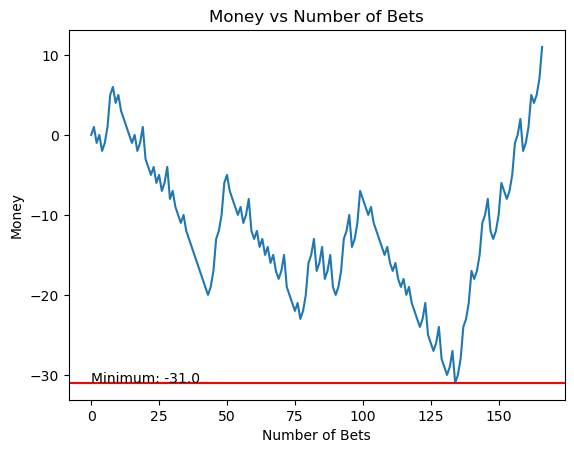

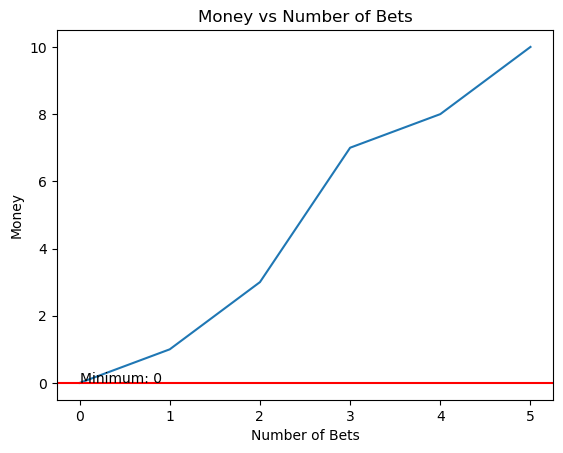

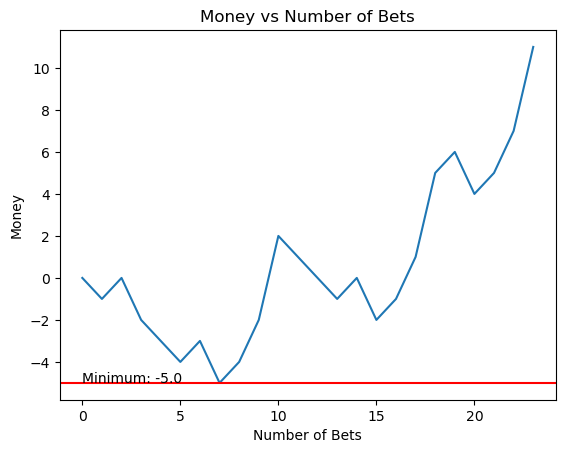

In [11]:
plot_money_histories(successful_histories, 10)

## Analysis when the goal is to win 100 units

In [10]:
len(successful_histories[100])

104

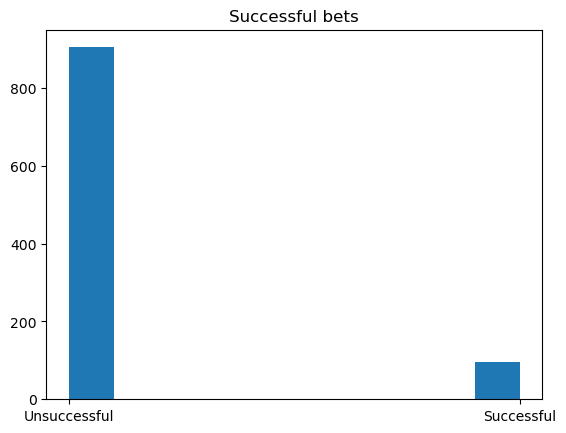

In [12]:
plot_successful_bets(money_histories[100], 100)

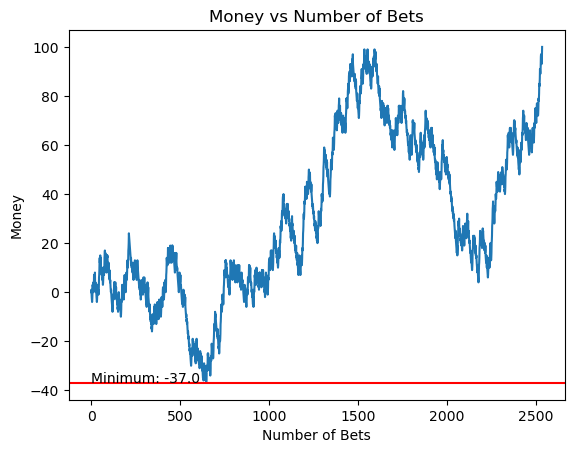

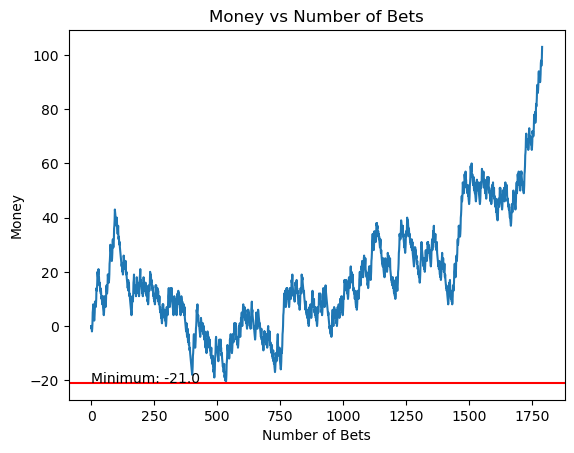

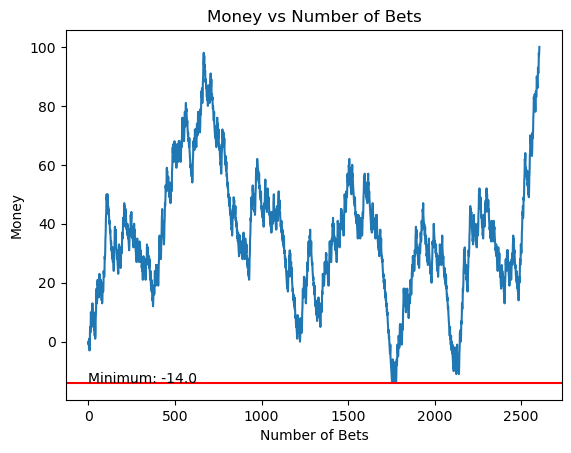

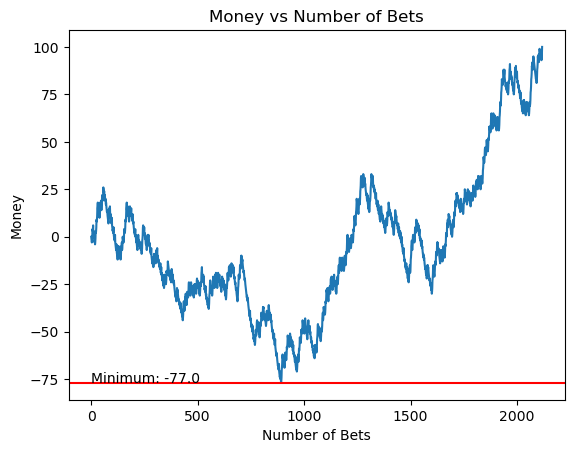

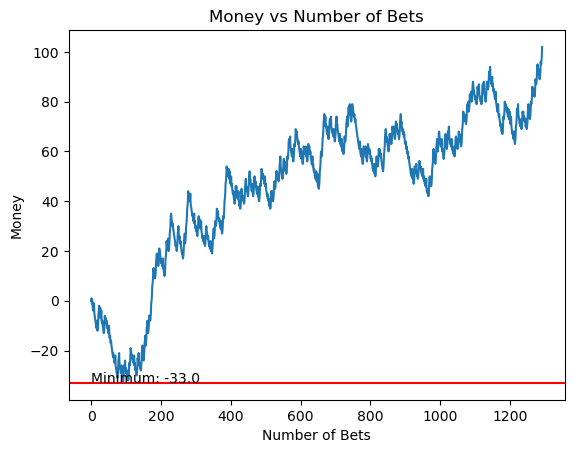

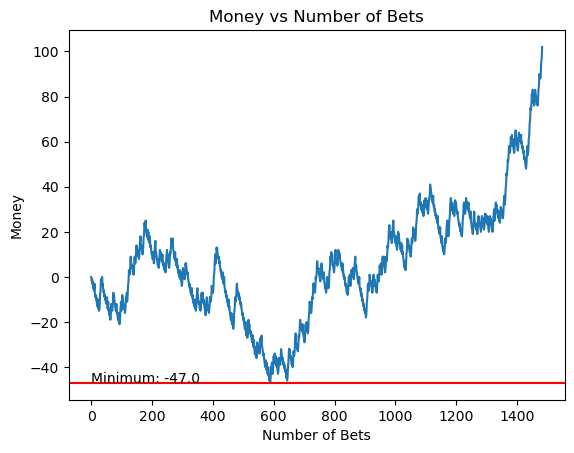

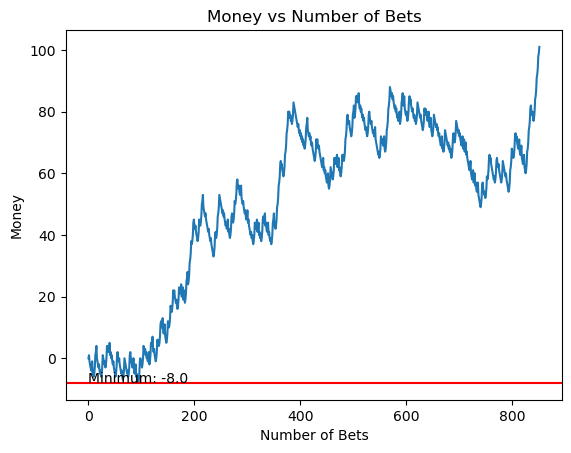

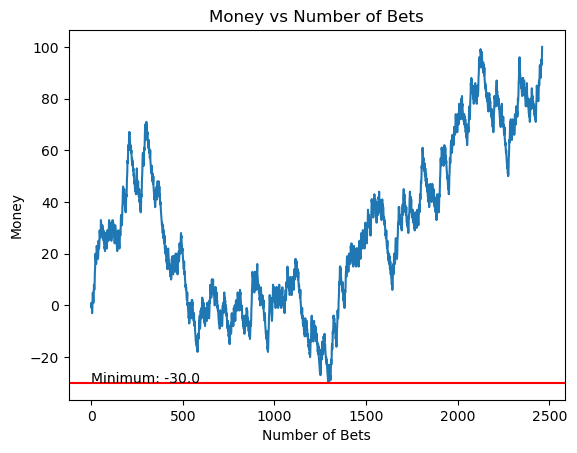

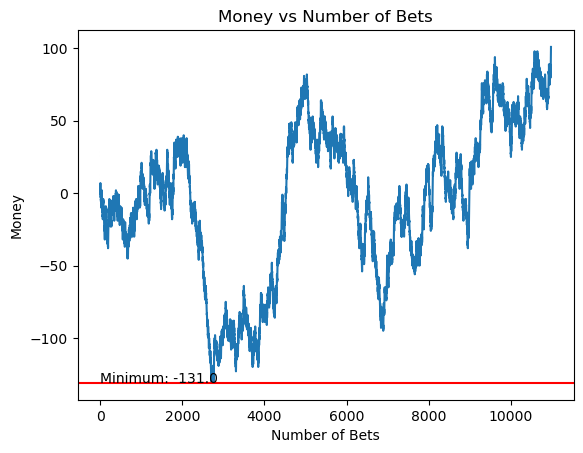

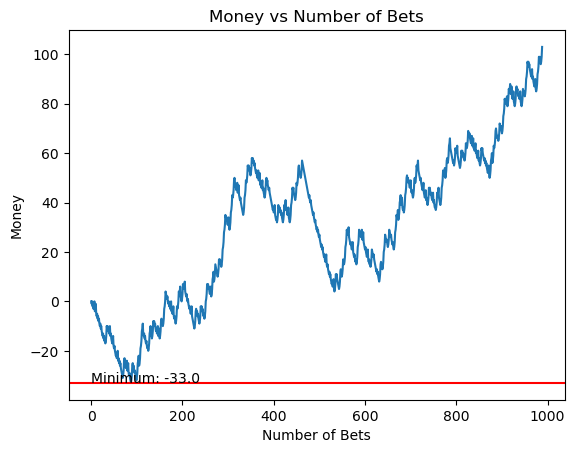

In [13]:
plot_money_histories(successful_histories, 100)

## Analysis when the goal is to win 500 units

In [14]:
len(successful_histories[500])

0

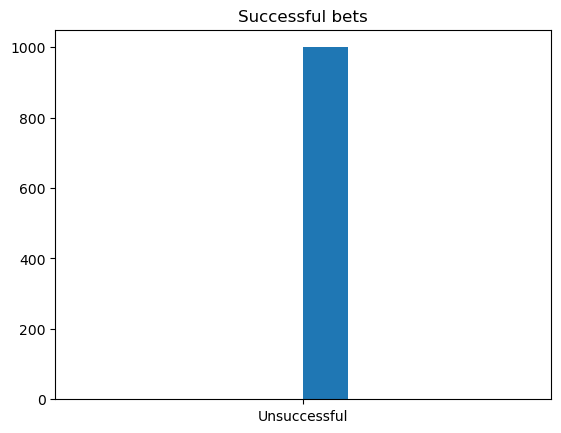

In [15]:
plot_successful_bets(money_histories[500], 500)

In [16]:
plot_money_histories(successful_histories, 500)

## Analysis when the goal is to win 1000 units

In [17]:
len(successful_histories[1000])

0

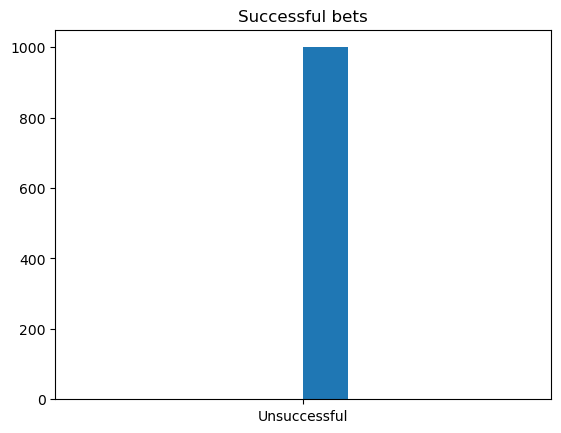

In [18]:
plot_successful_bets(money_histories[1000], 1000)

In [19]:
plot_money_histories(successful_histories, 1000)